In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
rawdata = pd.read_csv('bank-full-formatted.csv')

In [4]:
rawdata.shape

(45211, 17)

In [8]:
rawdata.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### No null values. Good to Go. !!! 
#### 16 Input features to predict whether client subscribe to the term deposit. 

## Univariate Analysis

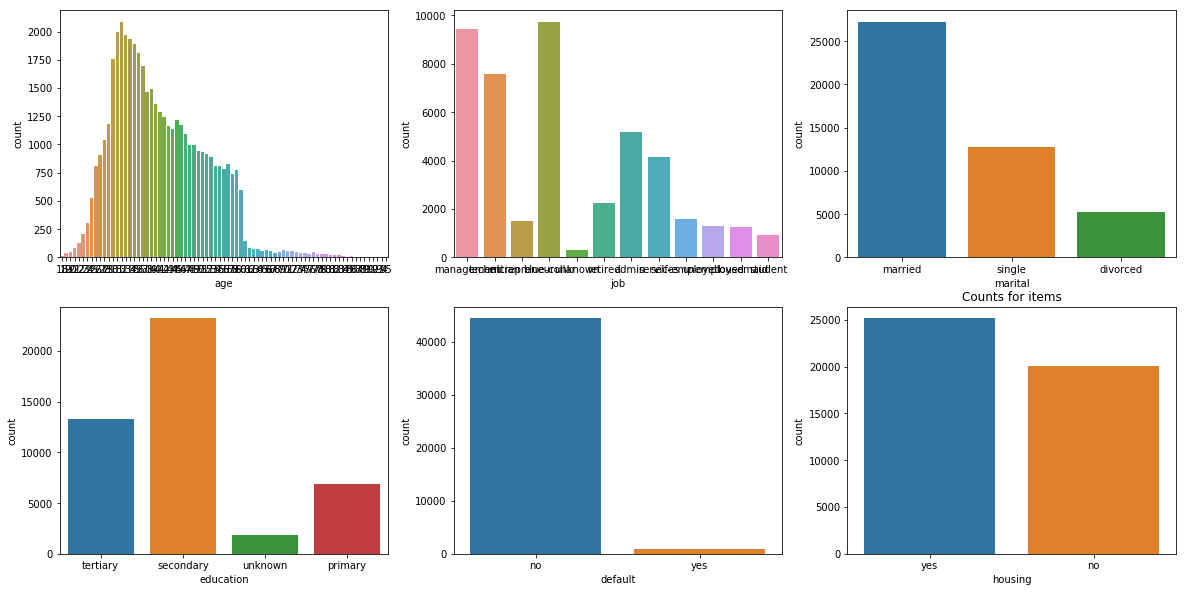

In [17]:
fig = plt.figure(figsize=(20,10))


ax11 = fig.add_subplot(231)
ax12 = fig.add_subplot(232)
ax13 = fig.add_subplot(233)
ax21 = fig.add_subplot(234)
ax22 = fig.add_subplot(235)
ax23 = fig.add_subplot(236)

sns.countplot(rawdata['age'], ax = ax11)
sns.countplot(rawdata['job'], ax = ax12)
sns.countplot(rawdata['marital'], ax = ax13)
sns.countplot(rawdata['education'], ax = ax21)
sns.countplot(rawdata['default'], ax = ax22)
sns.countplot(rawdata['housing'], ax = ax23)


plt.title("Counts for items")

plt.show()

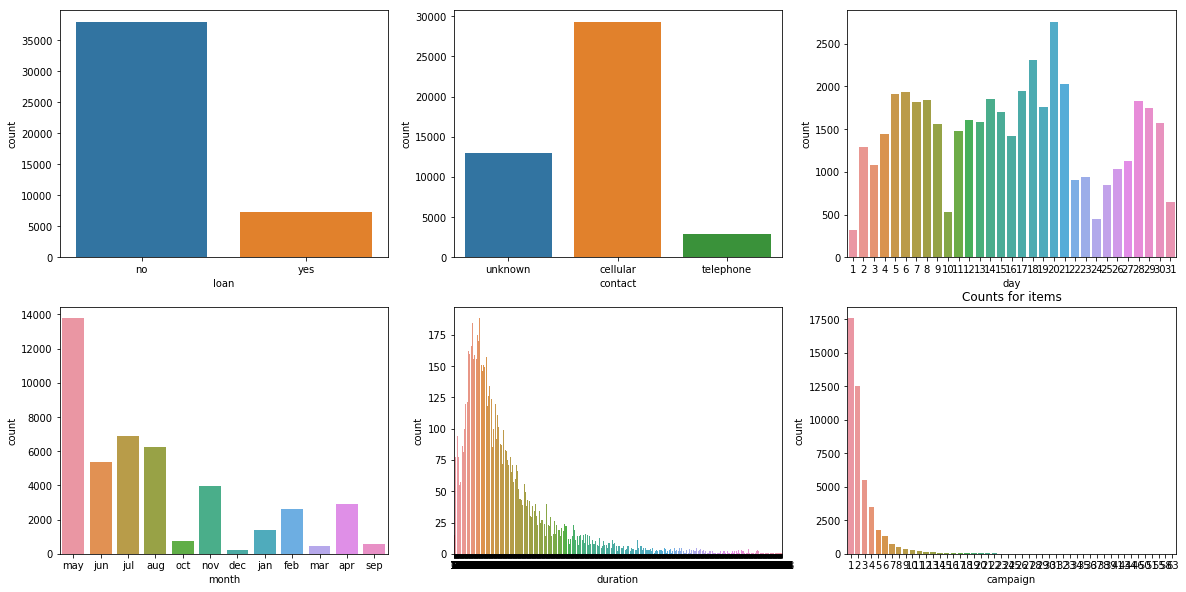

In [14]:
fig = plt.figure(figsize=(20,10))


ax11 = fig.add_subplot(231)
ax12 = fig.add_subplot(232)
ax13 = fig.add_subplot(233)
ax21 = fig.add_subplot(234)
ax22 = fig.add_subplot(235)
ax23 = fig.add_subplot(236)

sns.countplot(rawdata['loan'], ax = ax11)
sns.countplot(rawdata['contact'], ax = ax12)
sns.countplot(rawdata['day'], ax = ax13)
sns.countplot(rawdata['month'], ax = ax21)
sns.countplot(rawdata['duration'], ax = ax22)
sns.countplot(rawdata['campaign'], ax = ax23)


plt.title("Counts for items")

plt.show()

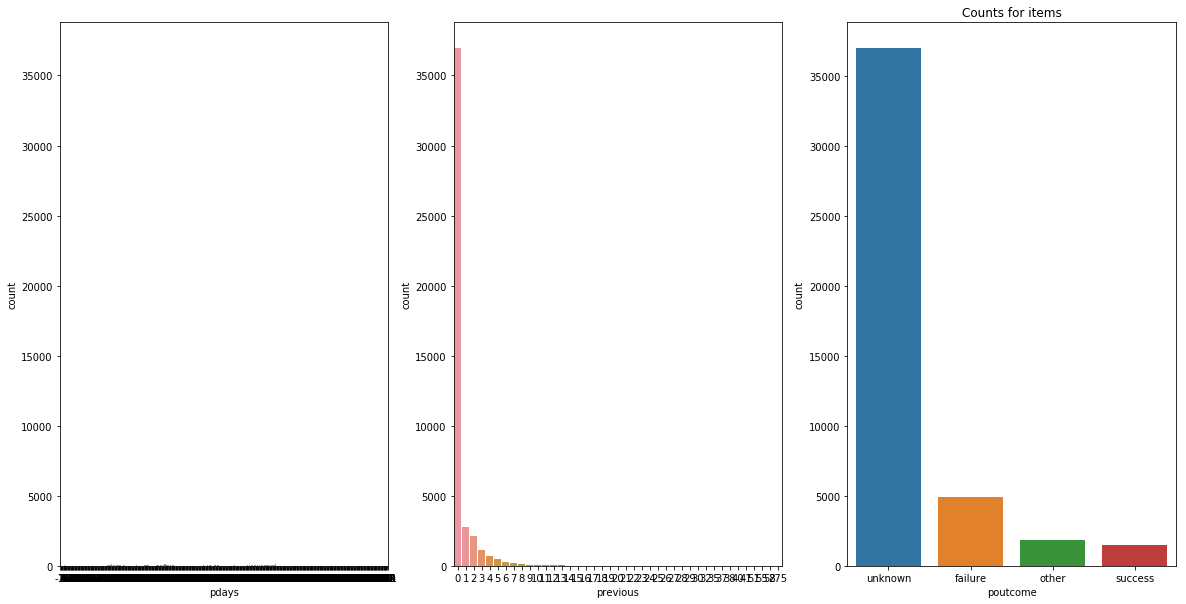

In [15]:
fig = plt.figure(figsize=(20,10))


ax11 = fig.add_subplot(131)
ax12 = fig.add_subplot(132)
ax13 = fig.add_subplot(133)

sns.countplot(rawdata['pdays'], ax = ax11)
sns.countplot(rawdata['previous'], ax = ax12)
sns.countplot(rawdata['poutcome'], ax = ax13)


plt.title("Counts for items")

plt.show()

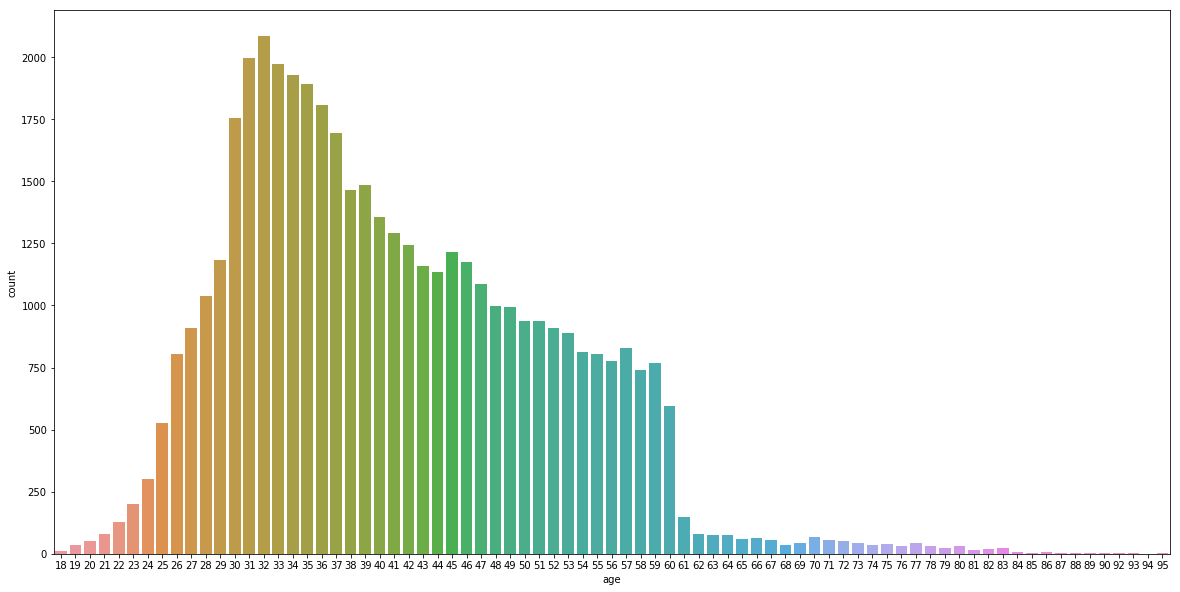

In [19]:
fig = plt.figure(figsize=(20,10))

sns.countplot(rawdata['age'])

plt.show()

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


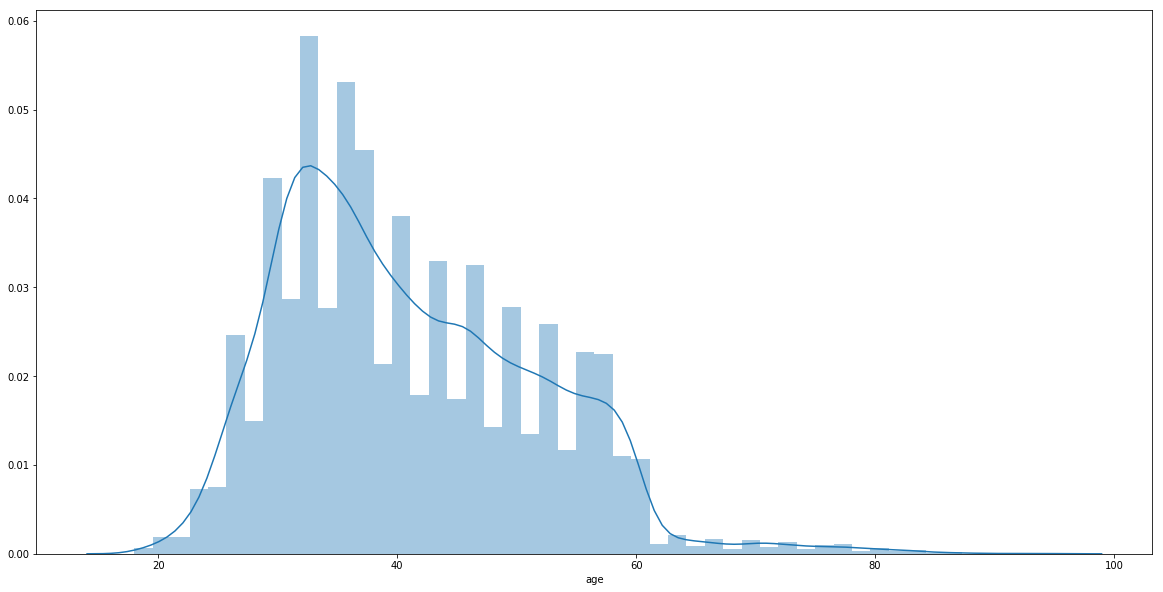

In [24]:
fig = plt.figure(figsize=(20,10))

sns.distplot(rawdata['age'])

plt.show()

## Multivariate Analysis

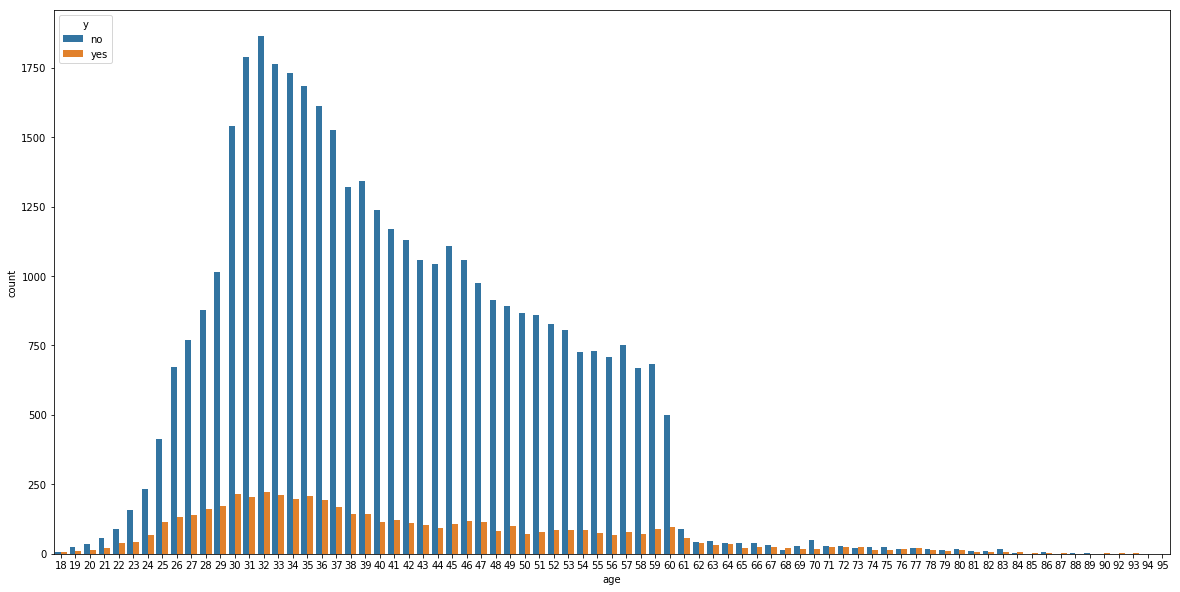

In [23]:
fig = plt.figure(figsize=(20,10))

sns.countplot(x = rawdata['age'], hue = rawdata['y'])

plt.show()

## PDF for Numerical Features
* Age
* Balance
* Day
* Duration
* Campaign
* PDays
* Previous

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


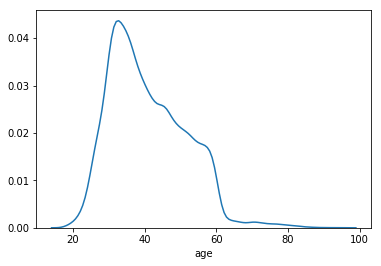

In [9]:
# age

term_deposit = ['i' for i in rawdata['y']]

sns.distplot(rawdata['age'], hist = False)

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


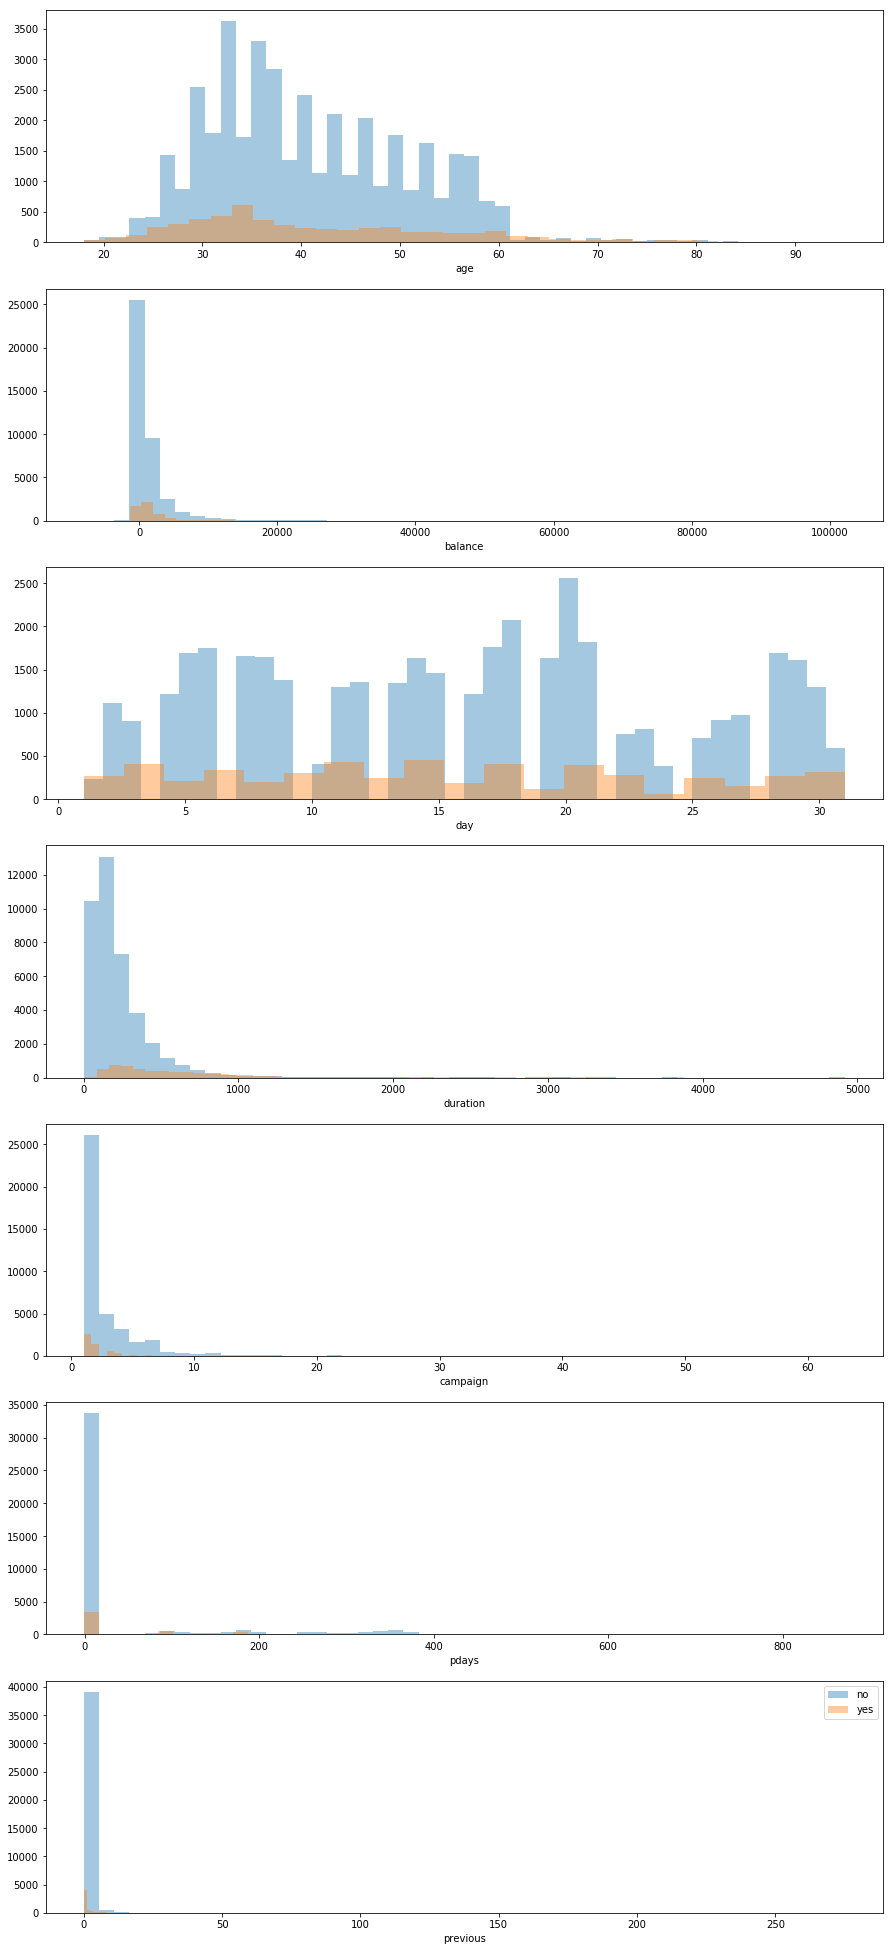

In [60]:
term_deposit = [i for i in rawdata['y'].unique()]

fig = plt.figure(figsize = (15,35))

ax1 = fig.add_subplot(711)
ax2 = fig.add_subplot(712)
ax3 = fig.add_subplot(713)
ax4 = fig.add_subplot(714)
ax5 = fig.add_subplot(715)
ax6 = fig.add_subplot(716)
ax7 = fig.add_subplot(717)

for i in term_deposit:
    term_deposit_i = rawdata[rawdata['y'] == i]
    
    sns.distplot(term_deposit_i['age'], kde = False,  label = i, ax = ax1)
    sns.distplot(term_deposit_i['balance'], kde = False, label = i, ax = ax2)
    sns.distplot(term_deposit_i['day'], kde = False, label = i, ax = ax3)
    sns.distplot(term_deposit_i['duration'], kde = False, label = i, ax = ax4)
    sns.distplot(term_deposit_i['campaign'], kde = False, label = i, ax = ax5)
    sns.distplot(term_deposit_i['pdays'], kde = False, label = i, ax = ax6)
    sns.distplot(term_deposit_i['previous'], kde = False, label = i, ax = ax7)
    
    
plt.legend() 
plt.show()

## Great Insights from above graphs. 
Some graphs needs to be zoomed in coz its very unclear due to outlier distributions. (balance, previous)

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


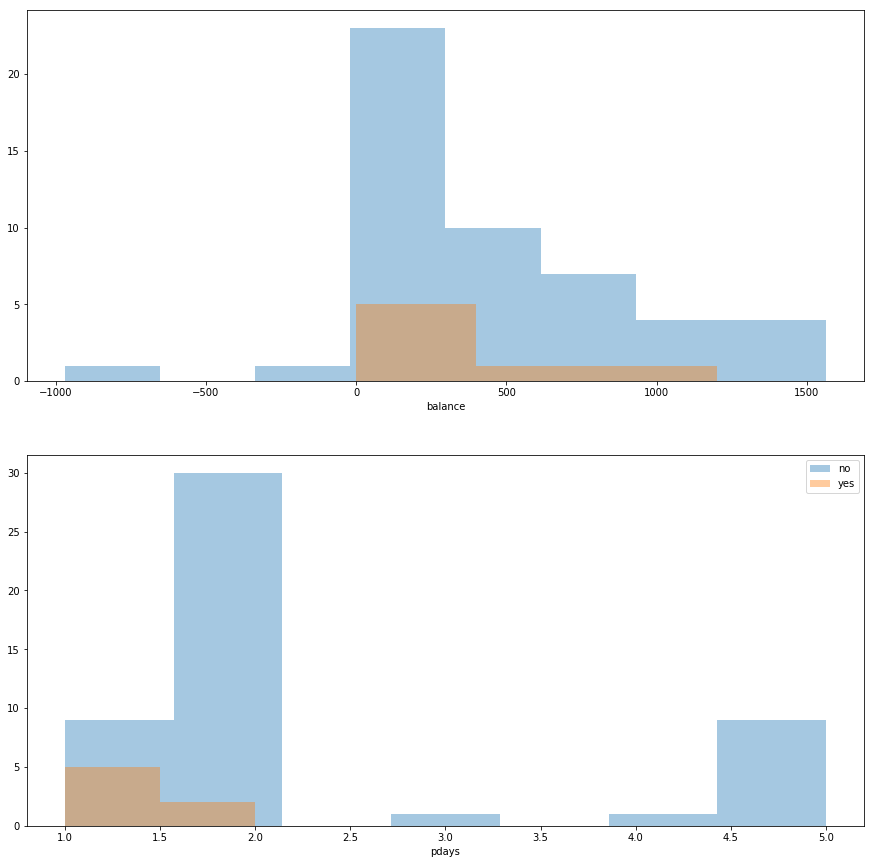

In [61]:
term_deposit = [i for i in rawdata['y'].unique()]

fig = plt.figure(figsize = (15,15))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for i in term_deposit:
    term_deposit_i = rawdata[(rawdata['y'] == i) & (rawdata['balance'] <= 2000) & (rawdata['balance'] >= -1000) & (rawdata['pdays'] <= 5) & (rawdata['pdays'] >= 0)]
    
    sns.distplot(term_deposit_i['balance'], kde = False, label = i, ax = ax1)
    sns.distplot(term_deposit_i['pdays'],  kde = False,  label = i, ax = ax2)
    
    
plt.legend() 
plt.show()

In [34]:
rawdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


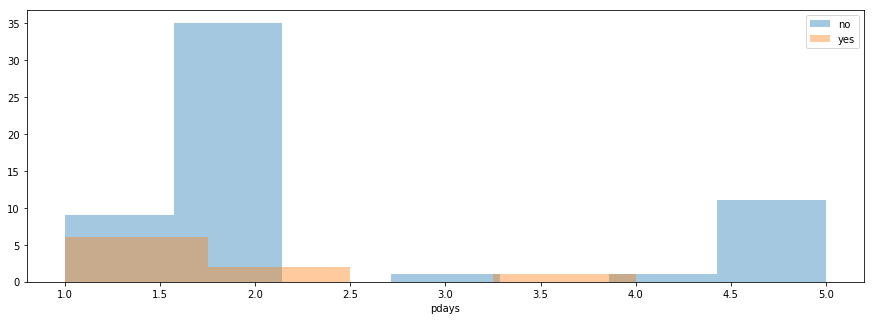

In [64]:
term_deposit = [i for i in rawdata['y'].unique()]

fig = plt.figure(figsize = (15,5))

for i in term_deposit:
    term_deposit_i = rawdata[(rawdata['y'] == i) & (rawdata['pdays'] <= 5) & (rawdata['pdays'] >= 0)]
    
    sns.distplot(term_deposit_i['pdays'], kde = False , label = i)

    
    
plt.legend() 
plt.show()

## Barplot for Categorical Features

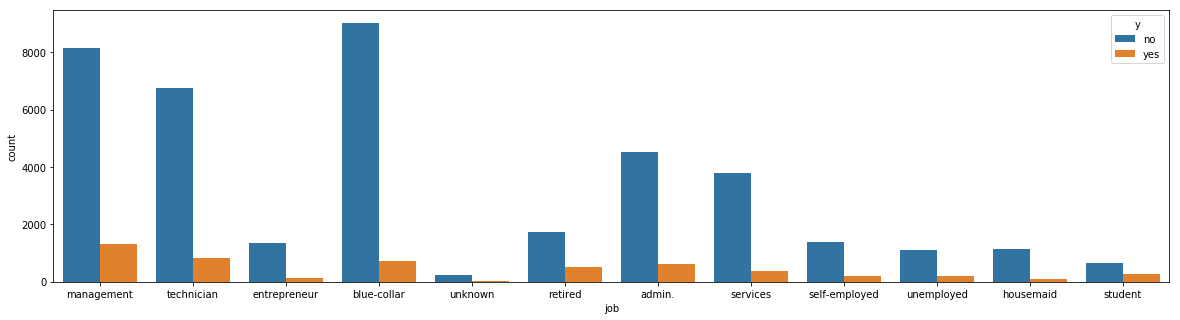

In [57]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x = rawdata['job'], hue = rawdata['y'])

###### A yes to No ratio line chart is also a good indicator

In [76]:

def get_count(data):
    data['Count_Value'] = len(data)
    return data

test1 = rawdata.groupby(['job' , 'y']).apply(get_count)
test1 = test1[['job' , 'y','Count_Value']].drop_duplicates()
test1.head(100)



,job,y,Count_Value
0,management,no,8157
1,technician,no,6757
2,entrepreneur,no,1364
3,blue-collar,no,9024
4,unknown,no,254
8,retired,no,1748
10,admin.,no,4540
14,services,no,3785
46,self-employed,no,1392
83,admin.,yes,631


In [80]:
def fun2(data):
    if data['y'] == 'no':
        a = data['Count_Value'] 
    if data['y'] == 'yes':
        b = data['Count_Value']
        
    data['a'] = a
    data['b'] = b
    return data

test2 = test1.groupby(['job']).apply(fun2)
test2.head(5)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [53]:
rawdata['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64